In [3]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kendalltau
import pandas as pd

test = 'test'
test2 = 'test2'

In [3]:
flask_in = 'flask_input.nc'
flask_mp = 'flask_output_TM5_MP.nc'
flask_esm = 'flask_output_ECEarth.nc'
flask_in = 'sample_coordinates_2008112200_2008112900.nc'
flask_mp = 'flask_outputTM52008112200_2008112900.nc'
flask_esm = 'flask_outputECE2008112200_2008112900.nc'
flask_in_fh = nc.Dataset(flask_in,mode='r')
flask_mp_fh = nc.Dataset(flask_mp,mode='r')
flask_esm_fh = nc.Dataset(flask_esm,mode='r')

x = 4000000000
fin_obs = flask_in_fh.variables['observed'][:x]
obs_num = flask_in_fh.variables['obs_num'][:x]
lat = flask_in_fh.variables['latitude'][:x]
lon = flask_in_fh.variables['longitude'][:x]
alt = flask_in_fh.variables['altitude'][:x]
fmp_obs0 = flask_mp_fh.variables['flask'][:x,0] #Are 10 members. First check if it works with 1
fmp_obs1 = flask_mp_fh.variables['flask'][:x,1]
fmp_obs2 = flask_mp_fh.variables['flask'][:x,2]
fesm_obs = flask_esm_fh.variables['flask'][:x,0]
print(np.shape(fin_obs),np.shape(fmp_obs0),np.shape(fesm_obs))

(22045,) (22045,) (22045,)


In [4]:

df = pd.DataFrame({'A_fin_obs' : fin_obs,
                   'B_fmp_obs' : fmp_obs0,
                   'C_fesm_obs': fesm_obs,
                   'D_alt'     : alt,
                   'E_lat'     : lat,
                   'F_lon'     : lon},index=obs_num)
tropics =df.A_fin_obs>0.0003
#print(df[tropics])
#print(df.sort(columns='D_alt'))

alt1 = (df.D_alt >0) & (df.D_alt<200)
alt2 = (df.D_alt >200) & (df.D_alt<1000)
alt3 = (df.D_alt >1000) & (df.D_alt<3000)
alt4 = (df.D_alt >3000) & (df.D_alt<10000)
alt5 = (df.D_alt >10000) & (df.D_alt<100000)

print(len(df.F_lon.unique()))

5919


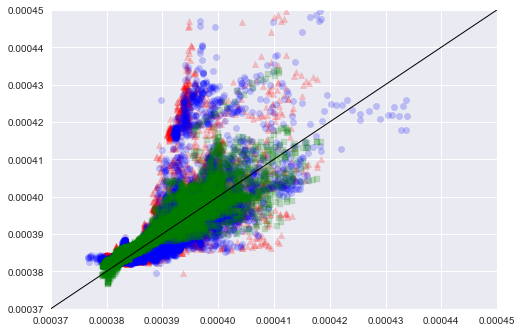

In [5]:
fig, ax = plt.subplots()
s = 121
ax.scatter(df.B_fmp_obs, df.A_fin_obs, color='r', s=s/3, marker='^', alpha=.2)
ax.scatter(df.C_fesm_obs, df.A_fin_obs, color='b', s=s/3, alpha=.2)
ax.scatter(df.B_fmp_obs, df.C_fesm_obs, color='g', s=s/3, marker='s', alpha=.2)
#ax.scatter(df.B_fmp_obs[alt2], df.C_fesm_obs[alt2], color='b', s=s/3, marker='s', alpha=.2)
#ax.scatter(df.B_fmp_obs[alt3], df.C_fesm_obs[alt3], color='r', s=s/3, marker='s', alpha=.2)
#ax.scatter(df.B_fmp_obs[alt4], df.C_fesm_obs[alt4], color='m', s=s/3, marker='s', alpha=.2)
#ax.scatter(df.B_fmp_obs[alt5], df.C_fesm_obs[alt5], color='c', s=s/3, marker='s', alpha=.2)
ax.set_ylim(0.000370,0.00045)
ax.set_xlim(0.000370,0.00045)
ax.plot([0, 1], [0, 1], color='k', linestyle='-', linewidth=1)
#plt.savefig('tot.png', bbox_inches='tight')
plt.show()

 - graphs for altitude, latitude,region,time,samplingstrategy etc


/Users/killaars/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


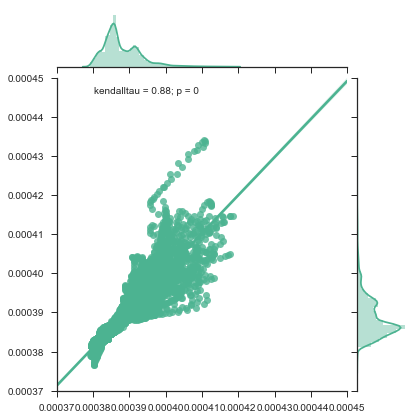

In [8]:
sns.set(style="ticks")

sns.jointplot(fmp_obs0, fesm_obs, kind="reg", stat_func=kendalltau, color="#4CB391",
              xlim=(0.000370,0.00045), ylim=(0.000370,0.00045))
#sns.plt.ylim(0.000370,0.000400)
#sns.plt.xlim(0.000370,0.000420)
sns.plt.show()

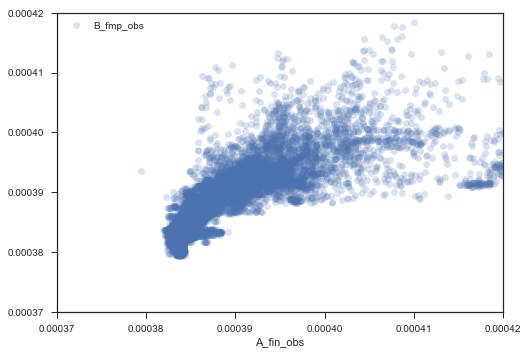

In [9]:
df.plot(x='A_fin_obs',y='B_fmp_obs',style='o',xlim=(0.000370,0.000420),ylim=(0.000370,0.000420),alpha=.2)
ax.plot([0, 1], [0, 1], color='k', linestyle='-', linewidth=1)
plt.show()

/Users/killaars/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/killaars/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/killaars/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


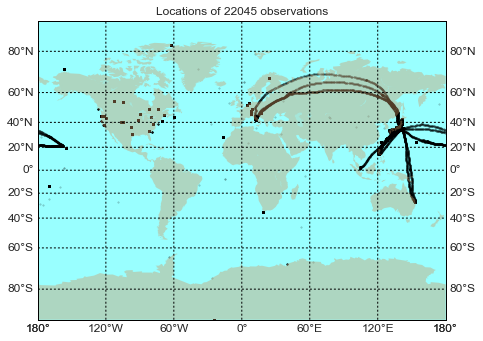

In [10]:
from netCDF4 import Dataset, num2date
import time, calendar, datetime, numpy
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import urllib, os
# data downloaded from the form at
# http://coastwatch.pfeg.noaa.gov/erddap/tabledap/apdrcArgoAll.html
filename =   'sample_coordinates_2008112200_2008112900.nc'
dset = Dataset(filename)
lats = dset.variables['latitude'][:]
lons = dset.variables['longitude'][:]

dset.close()
# draw map with markers for float locations
m = Basemap(projection='mill',lon_0=0)
x, y = m(lons,lats)
m.drawmapboundary(fill_color='#99ffff')
m.fillcontinents(color='#cc9966',lake_color='#99ffff',alpha=.4)
m.drawparallels(np.arange(-80,81,20),labels=[1,1,0,0])
m.drawmeridians(np.arange(0,360,60),labels=[0,0,0,1])
m.scatter(x,y,3,marker='o',color='k',alpha=.2)
plt.title('Locations of %s observations' %\
        (len(lats)),fontsize=12)
plt.show()